## réaliser par *EL MOUSAAIF MOHAMED* et *MOUHIHA MOHAMED*

# l'implémentation 

Dans notre implementation nous l'avons divisé en deux sections : 
la première pour illustrer un le cas des donnée linéairement séparables 
et la deuxième pour le cas des donnée non séparables linéairement

## le cas des donnée linéairement séparables

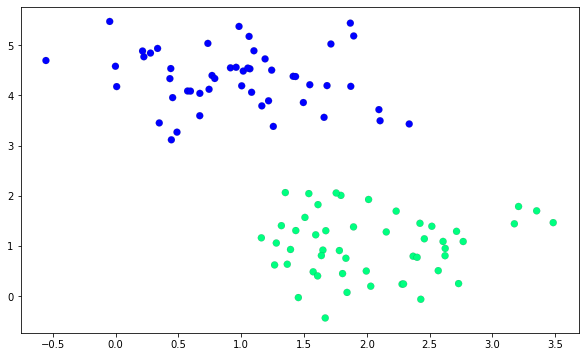

In [35]:
# importation des bibliothèques 

import pandas as pd  # traitement des données
import numpy as np # algèbre linière

# la bibliothèque Scikit pour SVM

from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

import itertools

# plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits import mplot3d
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# 
import import_ipynb

%matplotlib inline
plotColor=plt.cm.winter
observationSize=50

# generation des données linéairement séparables

# n_samples : le nombre total de points répartis également entre les clusters
# centers   : Nombre de centres à générer ou position centrale fixe. 
# random_state : Détermine la génération aléatoire utilisée pour créer un ensemble de données. 
# cluster_std  : Écart type de cluster
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

#Créer une nouvelle figure
plt.figure(figsize=(10,6));

#Un nuage de points de X[:, 1] par rapport à X[:, 0] avec une taille et / ou une couleur de marqueur variables.
#s : La taille du marqueur en points **2
#c : Les couleurs du marqueur
#cmap : Une instance de Colormap ou un nom de colormap enregistré. elle est utilisé lorsque c est un tableau de flottants.
#linewidth: La largeur de ligne des bords du marqueur. 
#edgecolors: La couleur du bord du marqueur
plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black');

### on va  définir quelques fonctions utilitaires

In [36]:
# pour tracer la fonction de décision pour un SVM bidimensionnel
def plot_svc_decision_function(model, X, y, ax=None, plot_support=True):
    plt.figure(figsize=(10,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=observationSize, cmap=plotColor, linewidth=.1, edgecolors='black');
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=observationSize * 3, linewidth=1, c='none', edgecolors='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# pour entraîner un modèle linéaire SVM
def train_linear_SVM(X, y, c=1E6):
    model = SVC(kernel='linear', C=c) # Support Vector Classification
    model.fit(X, y)
    return model


[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.06383637]]


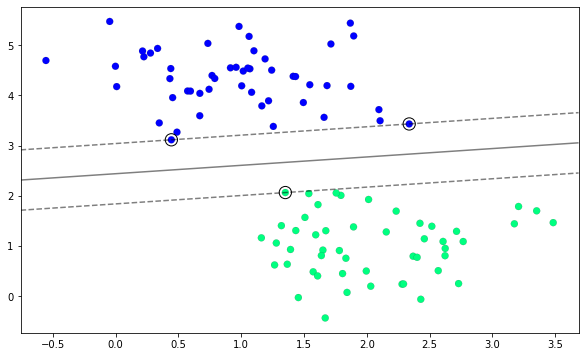

In [37]:
linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

**démonstration du cas de hard margin**

[[1.35139348 2.2       ]
 [1.35139348 2.06383637]]


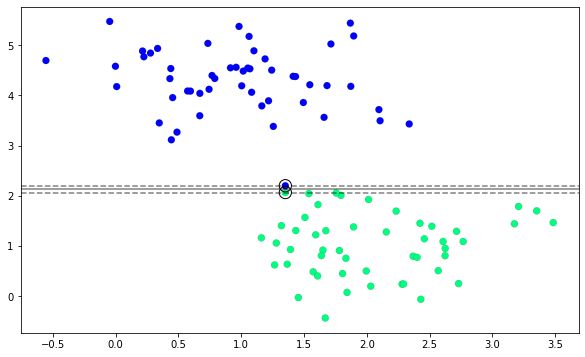

In [38]:
# l'ajoute d'une observation mal placé
X = np.append(X, [[1.35139348, 2.2]], axis=0)
y = np.append(y, 0)

linear_model = train_linear_SVM(X, y)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [1.35139348 2.2       ]
 [1.35139348 2.06383637]
 [1.53853211 2.04370263]]


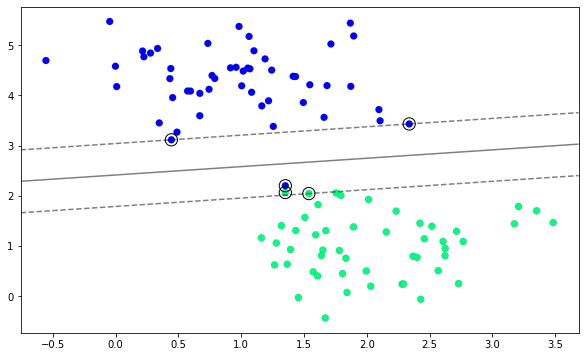

In [39]:
#on utilise une soft margin pour corriger la bordure de décision 
# on change c=1E6 par c=2
linear_model = train_linear_SVM(X, y, c=2)
plot_svc_decision_function(linear_model, X, y)
print(linear_model.support_vectors_)

## le cas des donnée non linéairement séparables

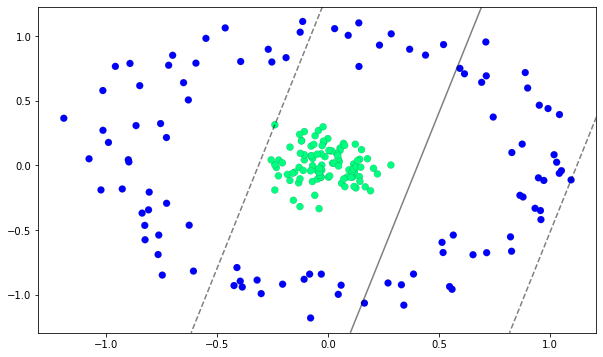

In [40]:
# avec des données circulaire
X, y = make_circles(200, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plot_svc_decision_function(clf,X,y, plot_support=False);


***Il est clair qu'on ne peut pas séparer ces données avec une discrimination linéaire.***  
Le SVM devient intéressant lorsqu'il est utilisé en conjonction avec des noyaux (kernels) et ce cas montre la motivation derrière le prince des fonctions noyaux.

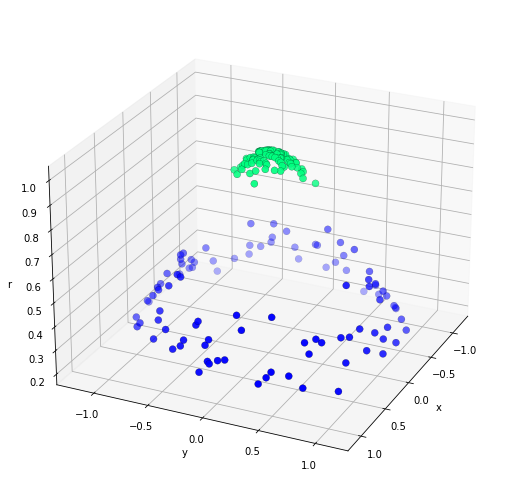

In [41]:
# dans ce modèle nous pourrions utiliser est une fonction de base radiale (RBF)
# pour générer un nouveau dimension
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

# Si nous traçons cela avec nos données, nous pouvons en voir l'effet:
plt.figure(figsize=(15,9))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=observationSize, cmap=plotColor, linewidth=.2,edgecolors='black');
ax.view_init(elev=25, azim=25);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('r');

***On voit qu'avec cette dimension supplémentaire, les données deviennent trivialement linéairement séparables***  
en traçant l'hyper plan à, disons, r = 0,7 par exemple 

**démonstration des cas** Under-fitted **et** Over-fitted

[LibSVM]

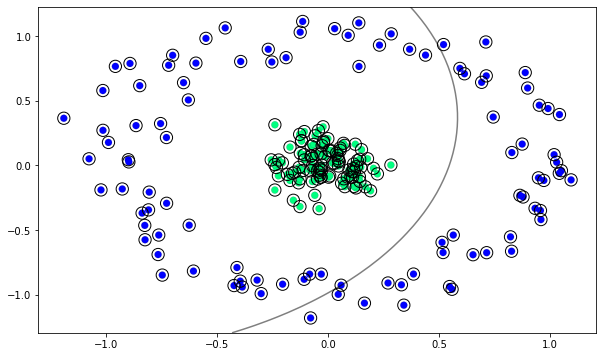

In [42]:
#Under-fitted
#gama: le coefficient de noyau (le paramètre qui indique le niveau d'engagement de chaque observation)
clf = SVC(C=1, kernel='rbf', gamma=0.01, verbose=True).fit(X, y)
plot_svc_decision_function(clf, X, y)

*le résultat est n'est pas correct, , le modèle prédictif n’arrive même pas à capturer les corrélations
du Training Set*

[LibSVM]

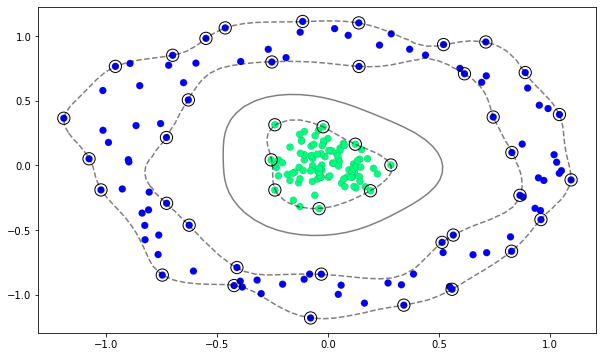

In [43]:
#Over-fitted
clf = SVC(C=1E7, kernel='rbf', gamma=10, verbose=True).fit(X, y)
plot_svc_decision_function(clf, X, y)

*le modèle prédictif est trop entraîné il effectue alors de mauvaise prédiction sur de nouvelles, car elles ne sont pas exactement les mêmes que celle du jeu d’entrainement*

[LibSVM]

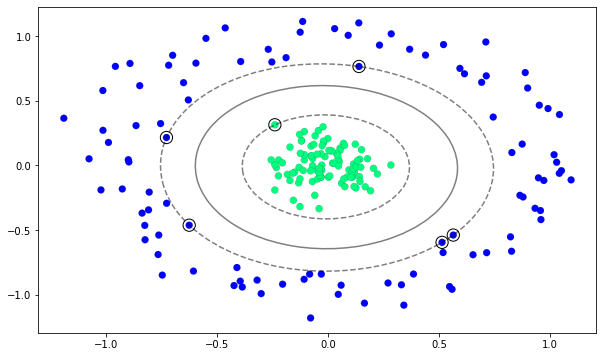

In [44]:
#good model
clf = SVC(kernel='rbf', C=1E6, gamma=0.1, verbose=True)
clf.fit(X, y)
plot_svc_decision_function(clf, X, y)

## non linéairement séparables avec dataset du penguins  
dataset : palmerpenguins  
url: https://allisonhorst.github.io/palmerpenguins/

<img width="440" src="penguins.png"></img>

In [45]:
# importation du dataset
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## préparation du dataset
avant d'utiliser dataset on doit la préparer (nettoyage)

In [46]:
#suppression des doublons
penguins = penguins.drop_duplicates()
#maintenant, vérifions combien de cellules restent vides dans le tableau.
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Nous ne pouvons pas laisser les cellules vides, nous devons donc remplir les tables avec les valeurs les plus appropriées.  
***Gestion des valeurs manquantes:***

In [47]:
# Remplacement des valeurs manquantes dans la colonne "bill_length_mm", "bill_depth_mm","flipper_length_mm" 
#par la valeur moyenne
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean(), inplace=True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean(), inplace=True)

#Remplacement des valeurs manquantes dans la colonne "Sex" par avec la valeur la plus fréquemment rencontrée
penguins['sex'].fillna(penguins['sex'].mode()[0], inplace=True)

#Normaliser et transformer les caractéristiques catégorielles non numériques en caractéristiques numériques.
le = LabelEncoder()
le = le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le = LabelEncoder()
le = le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])


penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [48]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


### visualisation du dataset

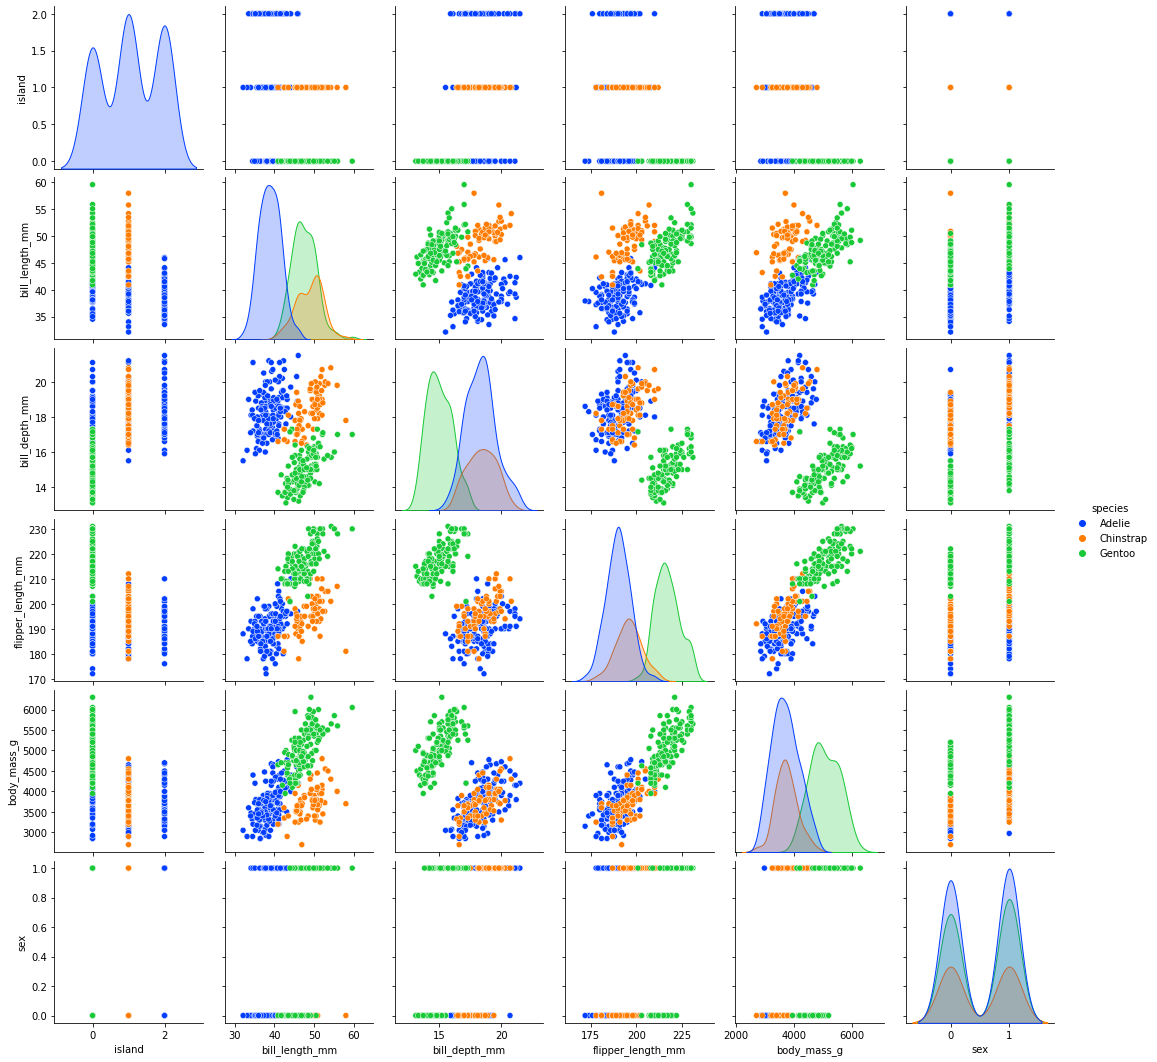

In [49]:
sns.pairplot(penguins, hue="species",palette="bright");

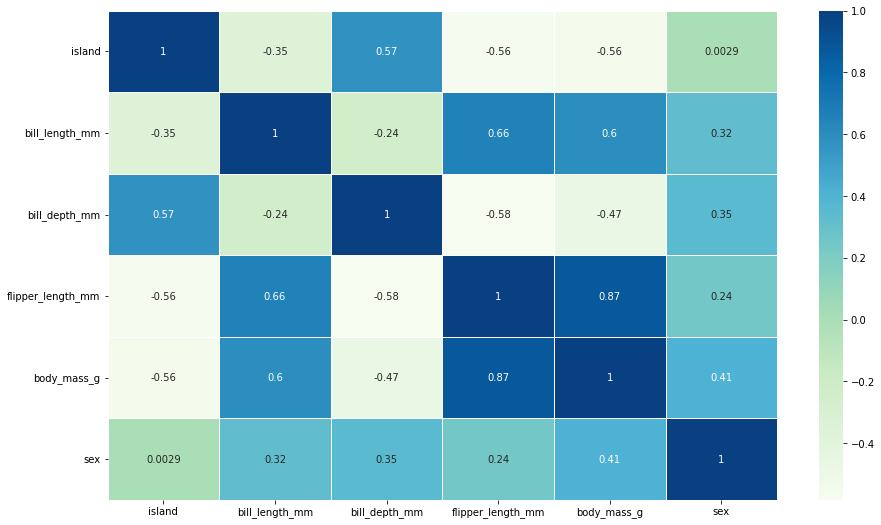

In [50]:
#la matrice de corrélation 
plt.subplots(figsize=(15,9))
sns.heatmap(penguins.corr(), cmap="GnBu", annot=True, linewidths=.5);

En remarque dans la matrice de corrélation qu'il y a une corrélation élevé entre les variables 
donc on peut les factoriser 

***factorisation des variables en utilisant l'ACP (Analyse en Composantes Principales)***

In [51]:
features = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
# Séparer les caractéristiques
X = penguins.loc[:, features].values
#Séparer la cible
y = penguins.loc[:,['species']].values

#Standardisation des variables 
X = StandardScaler().fit_transform(X)

#séparation des données d'entraînement et de test 
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=0)

#creation de modèle ACP
acp = PCA(n_components=2) #n_components: Nombre de composants à conserver
#adjustment des données au modèle ACP
acp.fit(X)

#Appliquer la réduction de dimensionnalité sur train_x
components_principal = acp.transform(train_x)
#générer une trame de données à partir de components_principal
df_principal = pd.DataFrame(data = components_principal, columns = ['CP1', 'CP2'])
#Normaliser et transformer y en données numériques
encoder = LabelEncoder().fit(np.ravel(y));
#concaténation de df_principal avec la cible
df_principal["species"] = train_y.copy()
#Appliquer la normalisation sur train_y
train_y = encoder.transform(np.ravel(train_y))

#Appliquer la réduction de dimensionnalité sur test_x
test_components = acp.transform(test_x)
#Appliquer la normalisation sur test_y
test_labels = encoder.transform(np.ravel(test_y))
print("le pourcentage d'information conservé : ",acp.explained_variance_ratio_)

#le dataframe apres la réduction de dimensions 
df_principal

le pourcentage d'information conservé :  [0.54495768 0.24559557]


,CP1,CP2,species
0,-1.312835,2.160302,Adelie
1,1.892179,-1.565283,Gentoo
2,-0.143270,1.046929,Adelie
3,-2.038722,-1.155496,Adelie
4,2.006348,-1.840635,Gentoo
...,...,...,...
253,3.111316,0.408223,Gentoo
254,0.079001,1.694871,Chinstrap
255,-2.046454,1.722710,Adelie
256,-2.429166,0.734804,Adelie


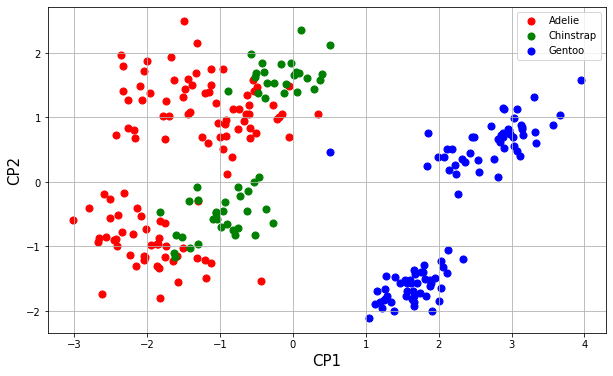

In [52]:
# laffichage de df_principal

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('CP1', fontsize = 15)
ax.set_ylabel('CP2', fontsize = 15)
targets = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_principal['species'] == target
    ax.scatter(df_principal.loc[indicesToKeep, 'CP1'], df_principal.loc[indicesToKeep, 'CP2'], c = color, s = 50)
ax.legend(targets)
ax.grid()

***maintenant on peut classifier cette dataset qui contient (CP1, CP2 et species) avec SVM***

on veut comparer les résultats si on applique les différents kernels   


*le code adapté* : https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

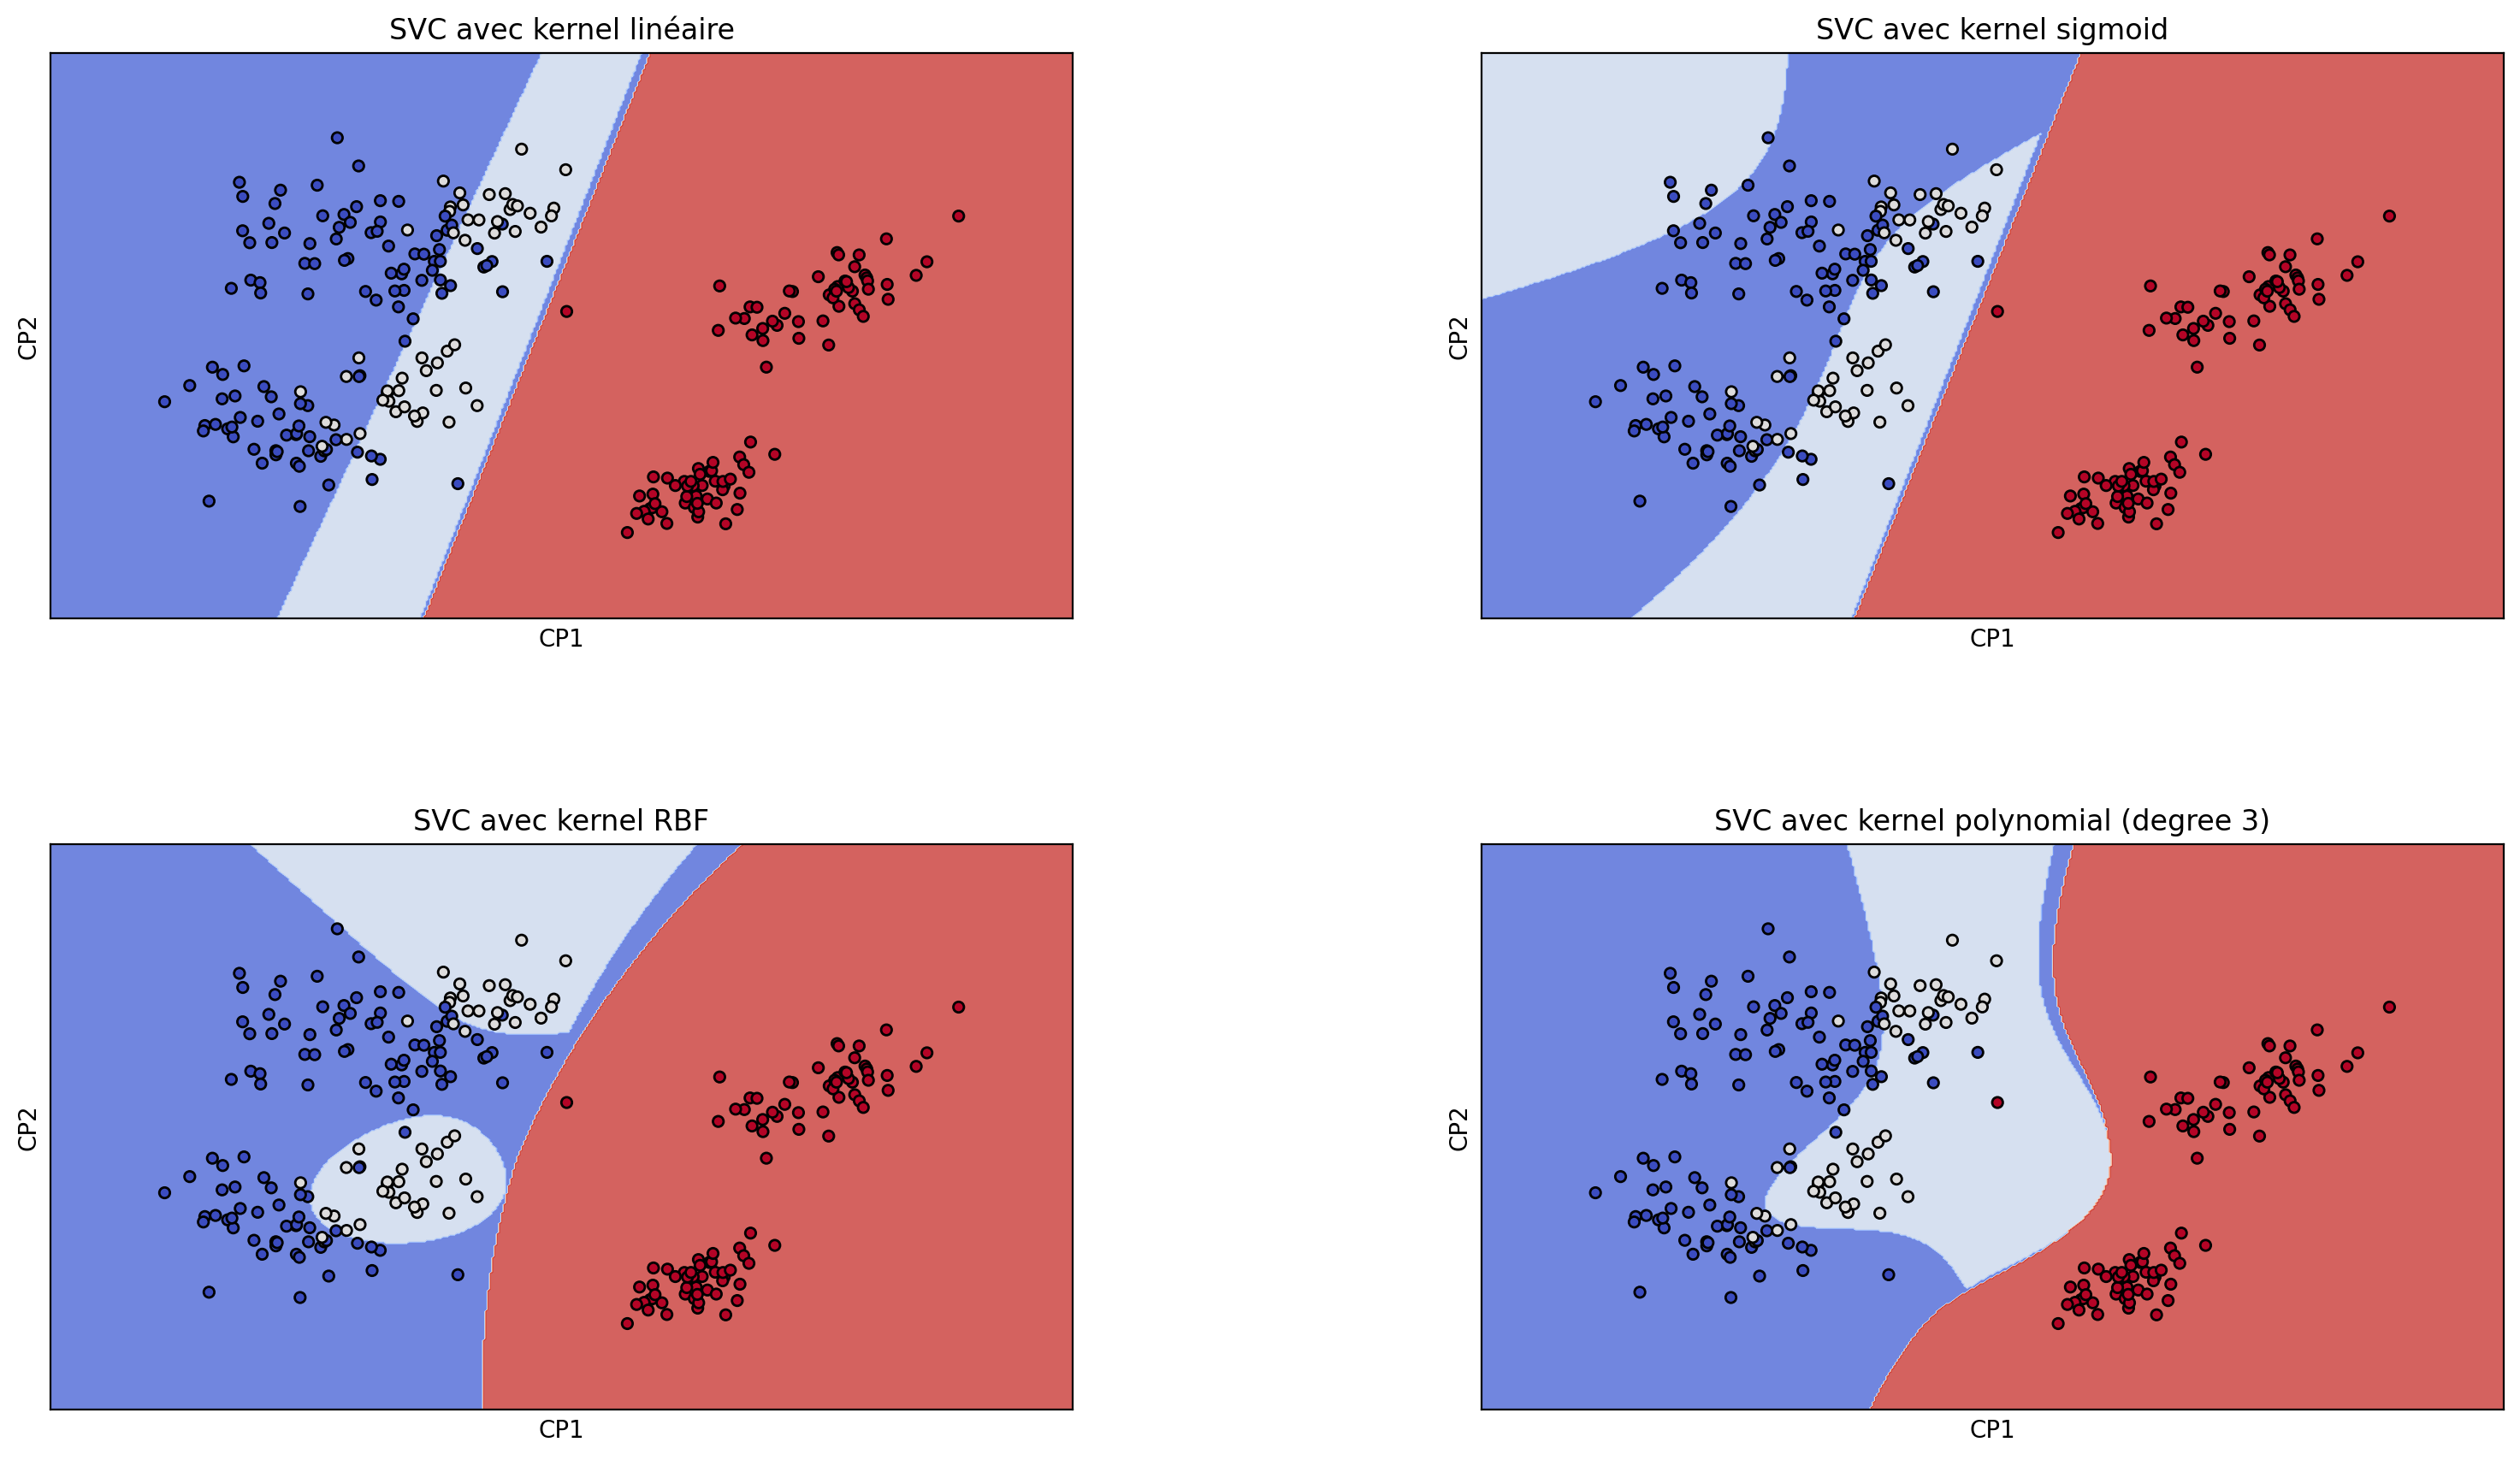

[SVC(C=1000000.0, kernel='linear'), SVC(C=1000000.0, gamma=0.01, kernel='sigmoid'), SVC(C=1000000.0, gamma=0.01), SVC(C=1000000.0, gamma=0.01, kernel='poly')]


In [80]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# on fix les paramètres
C = 1E6
gamma = 0.01

#le tableau qui va continuer les résultats 
results = {"kernel": [], "Accuracy": []}


models = [
    SVC(kernel="linear", C=C),
    SVC(kernel='sigmoid', C=C, gamma=gamma),
    SVC(kernel="rbf", gamma=gamma, C=C),
    SVC(kernel="poly", degree=3, gamma=gamma, C=C),
]

#adjustment des données à chaque modèle
for i, clf in enumerate(models):
    models[i] = clf.fit(components_principal,train_y)

titles = [
    "SVC avec kernel linéaire",
    "SVC avec kernel sigmoid",
    "SVC avec kernel RBF",
    "SVC avec kernel polynomial (degree 3)",
]

#initialisation d'une grille 2x2 pour le tracé.
fig, sub = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
fig.set_dpi(200)
plt.subplots_adjust(wspace=0.4, hspace=0.4)


X0, X1 = components_principal[:, 0], components_principal[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #calcule d'accuracy
    acc = clf.score(test_components, test_labels)
    results["kernel"].append(title)
    results["Accuracy"].append(acc)
    
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=train_y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("CP1")
    ax.set_ylabel("CP2")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()


In [81]:
#l'affichage des résultats 
accuracyDF = pd.DataFrame(results)
accuracyDF.sort_values("Accuracy", ascending=False)

,kernel,Accuracy
2,SVC avec kernel RBF,0.941860
3,SVC avec kernel polynomial (degree 3),0.930233
0,SVC avec kernel linéaire,0.848837
1,SVC avec kernel sigmoid,0.813953


on remarque que RBF et polynomial ont une grand accuracy

***maintenant on va créer et afficher la matrice de confusion du RBF pour voir dans quelles régions notre modèle a commis des fautes ***

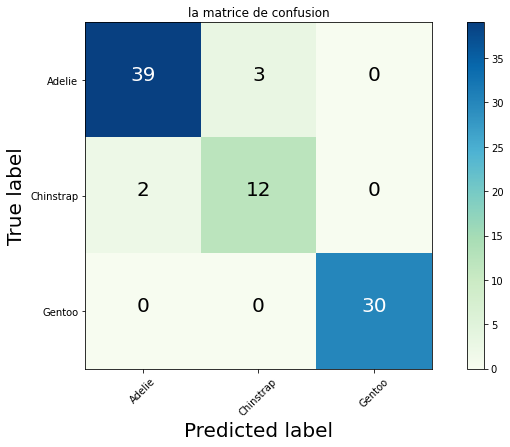

In [83]:
def plot_confusion_matrix(cm, classes):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.GnBu)
    plt.title("la matrice de confusion")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)
    
# le 3eme element dans models
rbf = models[2]
cm = confusion_matrix(test_labels, rbf.predict(test_components))
plot_confusion_matrix(cm,targets)

on peut voir que le RBF a répondu justement pour les observations de classe Gentoo 
mais pas le cas pour les autres, il a commis **3 erreurs** dans la classe Adelie et **2** dans la classe Chinstrap.